![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 11 - Clustering</center>
### <center> K-Means</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/11_Clustering/MainKMeans1.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

np.random.seed(1)

### Generate some data:

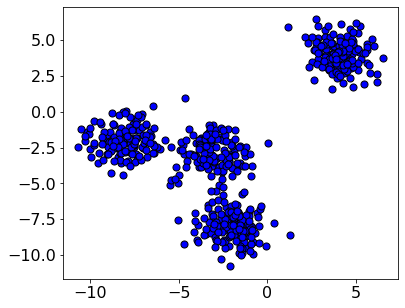

In [2]:
mMu = np.array([[4,   4],
                [-3, -3],
                [-2, -8],
                [-8, -2]])
Ni = 150
mX = np.row_stack([np.random.randn(Ni, 2) + vMu for vMu in mMu])
N  = mX.shape[0]

plt.figure(figsize=(6,5))
plt.scatter(mX[:,0], mX[:,1], s=50, c='b', edgecolor='k')
plt.axis('equal')
plt.axis('tight')
plt.show()

### A simple implementation of the K-Means algorithm:

In [3]:
from scipy.spatial.distance import cdist

def KMeans(mX, K, mMu0):

    lMu     = [mMu0]
    numIter = 10
    for ii in range(numIter):

        #-- Step 1, assign clusters:
        mD   = cdist(mX, lMu[-1])
        vIdx = np.argmin(mD, axis=1)

        #-- Step 2, compute clusters means
        mMui = np.r_[[np.mean(mX[vIdx == kk], axis=0) for kk in range(K)]]

        lMu.append(mMui)
    
    return lMu #-- in practice, we only need to last one: lMu[-1]

### Apply the algorithm:

In [4]:
K    = 4                          #-- number of clusters
mMu0 = mX[[151, 152, 153, 154],:] #-- initial means

lMu  = KMeans(mX, K, mMu0)

### Plot function:

In [5]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def PlotKMeans(lMu, iteration):
    mMu  = lMu[iteration]
    mD   = cdist(mX, mMu)
    vIdx = np.argmin(mD, axis=1)
    vor  = Voronoi(mMu)
    
    fig = plt.figure(figsize=(6,5))
    plt.scatter(mX[:,0], mX[:,1], c=vIdx)
    plt.plot(mMu[:,0], mMu[:,1], '.r', markersize=20)
    voronoi_plot_2d(vor, ax=fig.axes[0], show_points=False, line_width=2, show_vertices=False)
    plt.axis('equal')
    plt.title('Iteration = ' + str(iteration))
    plt.axis([-12, 8, -12, 8])

In [6]:
from ipywidgets import interact, IntSlider, Layout
from functools  import partial

PlotAux    = lambda iteration: PlotKMeans(lMu, iteration)
iterSlider = IntSlider(min=0, max=10, step=1, value=0, layout=Layout(width='80%'))
interact(PlotAux, iteration=iterSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='iteration', layout=Layout(width='80%'), max=10), Output(…

### Apply the algorithm with a different initial clusters:

In [7]:
K    = 4                      #-- number of clusters
mMu0 = mX[[1, 152, 153, 3],:] #-- initial means
lMu  = KMeans(mX, K, mMu0)

In [8]:
PlotAux    = lambda iteration: PlotKMeans(lMu, iteration)
iterSlider = IntSlider(min=0, max=10, step=1, value=0, layout=Layout(width='80%'))
interact(PlotAux, iteration=iterSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='iteration', layout=Layout(width='80%'), max=10), Output(…

### Sk-learn implementation:
To obtain stable results:
* Multiple initialization `n_init`  
* Smart initialization `init` (kmean++)

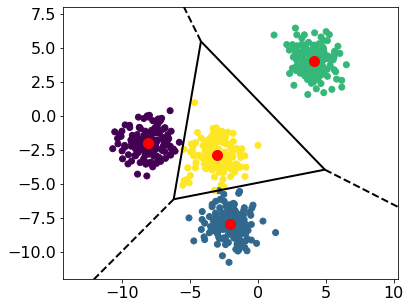

In [9]:
from sklearn.cluster import KMeans

KMeansFit = KMeans(n_clusters=K, n_init=1, init='random').fit(mX)
# KMeansFit = KMeans(n_clusters=K).fit(mX) #-- use default for stable results
vIdx      = KMeansFit.predict(mX)
mMu       = KMeansFit.cluster_centers_
vor       = Voronoi(mMu)

fig = plt.figure(figsize=(6,5))
plt.scatter(mX[:,0], mX[:,1], c=vIdx)
plt.plot(mMu[:,0], mMu[:,1], '.r', markersize=20)
voronoi_plot_2d(vor, ax=fig.axes[0], show_points=False, line_width=2, show_vertices=False)
plt.axis('equal')
plt.axis([-12, 8, -12, 8])
plt.show()